In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [14]:
df = pd.read_csv('./gender_discrimination.csv')

In [19]:
df.head()

,gender,decision
0,male,promoted
1,male,promoted
2,male,promoted
3,male,promoted
4,male,promoted


In [8]:
num_simulations = 100000 # just arbitrarily decided on this number

In [9]:
def generate_random_sample(N=48):
    """
    Create an array with length 48 consisting of 0's or 1's.
    0 means the employee was not promoted
    1 means the employee was promoted

    The first 24 elements represent men, and the latter 24 elements represent women
    """
    sample = random.choices([0,1], weights=[13,35],k=N) # 13 people were not promoted and 35 people were promoted in the point estimate
    return sample

In [10]:
sample_proportions = []
for _ in range(num_simulations):
    sample = generate_random_sample()
    size_of_sample = len(sample)
    male_promotion_rate = sum(sample[:24]) / size_of_sample
    female_promotion_rate = sum(sample[24:]) / size_of_sample
    sample_proportions.append(male_promotion_rate-female_promotion_rate)

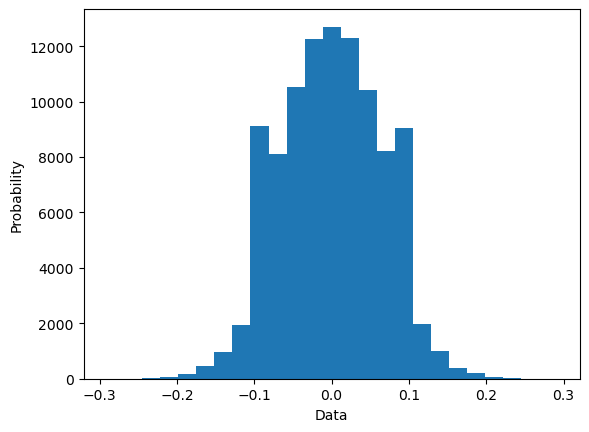

In [11]:
%matplotlib inline
x = sample_proportions

plt.hist(x, density=False, bins=25)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

In [13]:
pdf = stats.gaussian_kde(sample_proportions)

# get probability
pdf.integrate_box_1d(float('-inf'),0)

0.5001152246142904